# Exploratory Analysis


In [0]:
#import appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [0]:
#combined training and testing sets to have entire dataset to ensure features are the
#same in both train and test sets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'16N6CwZ16PBfQf1Jj2zEwSBq3bKpYi0gP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')
downloaded.GetContentFile('test.csv')


#3. Read file as panda dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]    

In [0]:
%matplotlib inline

plt.style.use('bmh')

In [0]:
#cols=['url','timedelta','n_tokens_title','n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']
#create dataframe
mash=train_df
logdf=np.log(train_df[' shares']) #this could be the new target in training in model code, test would be the same

In [0]:
type(mash)

pandas.core.frame.DataFrame

In [0]:
mash.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.542456,10.394261,548.463566,0.529766,0.969131,0.671902,10.893962,3.303894,4.574145,1.248148,...,0.095163,0.755796,-0.259383,-0.522241,-0.107160,0.282632,0.071050,0.341690,0.155990,3408.428788
std,214.015301,2.111063,475.306431,0.138186,0.172965,0.155588,11.370187,3.855329,8.377399,4.101456,...,0.071350,0.248886,0.127773,0.290679,0.095009,0.324356,0.265484,0.188949,0.226266,12245.672080
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,164.500000,9.000000,247.000000,0.470311,1.000000,0.625000,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328750,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,950.000000
50%,339.000000,10.000000,410.000000,0.538776,1.000000,0.690341,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253704,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,718.000000,0.608125,1.000000,0.754310,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186476,-0.300000,-0.050000,0.500000,0.148182,0.500000,0.250000,2800.000000
max,731.000000,20.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,74.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [0]:
#print first five rows of dataframe
mash.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/06/06/social-makeover...,581.0,9.0,645.0,0.523659,1.0,0.705722,9.0,4.0,1.0,...,0.033333,0.8,-0.249653,-0.4,-0.125,0.066667,0.033333,0.433333,0.033333,821
1,http://mashable.com/2013/03/18/gears-of-war-ju...,661.0,11.0,2104.0,0.376261,1.0,0.557325,25.0,3.0,11.0,...,0.100000,1.0,-0.275221,-0.8,-0.050,0.100000,0.000000,0.400000,0.000000,784
2,http://mashable.com/2014/09/17/ios-8-arrives-h...,113.0,10.0,540.0,0.580786,1.0,0.649852,30.0,2.0,1.0,...,0.033333,0.8,-0.300000,-0.8,-0.050,0.900000,0.500000,0.400000,0.500000,1400
3,http://mashable.com/2014/09/22/twitter-app-how...,107.0,10.0,711.0,0.530670,1.0,0.668113,21.0,7.0,2.0,...,0.033333,0.8,-0.251282,-0.5,-0.050,0.100000,0.200000,0.400000,0.200000,781
4,http://mashable.com/2014/07/31/doctor-who-prem...,161.0,13.0,796.0,0.473418,1.0,0.624242,12.0,0.0,1.0,...,0.100000,0.6,-0.194753,-0.6,-0.050,0.400000,0.100000,0.100000,0.100000,2400


In [0]:
mash.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31710,http://mashable.com/2014/02/20/olympics-winners/,322.0,12.0,1555.0,0.398579,1.0,0.602941,20.0,14.0,3.0,...,0.033333,1.0,-0.277083,-1.0,-0.10,0.383333,-0.183333,0.116667,0.183333,1900
31711,http://mashable.com/2014/09/04/mockingjay-teas...,126.0,14.0,1053.0,0.493583,1.0,0.688013,7.0,4.0,0.0,...,0.050000,1.0,-0.431391,-1.0,-0.05,0.000000,0.000000,0.500000,0.000000,1300
31712,http://mashable.com/2014/08/06/tech-companies-...,154.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.00,0.900000,-0.600000,0.400000,0.600000,4900
31713,http://mashable.com/2014/03/02/jared-leto-osca...,312.0,12.0,625.0,0.529126,1.0,0.716292,9.0,2.0,2.0,...,0.033333,0.8,-0.215432,-0.4,-0.10,0.200000,0.100000,0.300000,0.100000,3300
31714,http://mashable.com/2013/02/23/facebook-securi...,684.0,10.0,190.0,0.657895,1.0,0.784483,7.0,2.0,0.0,...,0.033333,0.5,0.000000,0.0,0.00,0.550000,0.350000,0.050000,0.350000,4900


In [0]:
mash.shape

(31715, 61)

In [0]:
mash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 61 columns):
url                               31715 non-null object
 timedelta                        31715 non-null float64
 n_tokens_title                   31715 non-null float64
 n_tokens_content                 31715 non-null float64
 n_unique_tokens                  31715 non-null float64
 n_non_stop_words                 31715 non-null float64
 n_non_stop_unique_tokens         31715 non-null float64
 num_hrefs                        31715 non-null float64
 num_self_hrefs                   31715 non-null float64
 num_imgs                         31715 non-null float64
 num_videos                       31715 non-null float64
 average_token_length             31715 non-null float64
 num_keywords                     31715 non-null float64
 data_channel_is_lifestyle        31715 non-null float64
 data_channel_is_entertainment    31715 non-null float64
 data_channel_is_bus              317

count     31715.000000
mean       3408.428788
std       12245.672080
min           4.000000
25%         950.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64


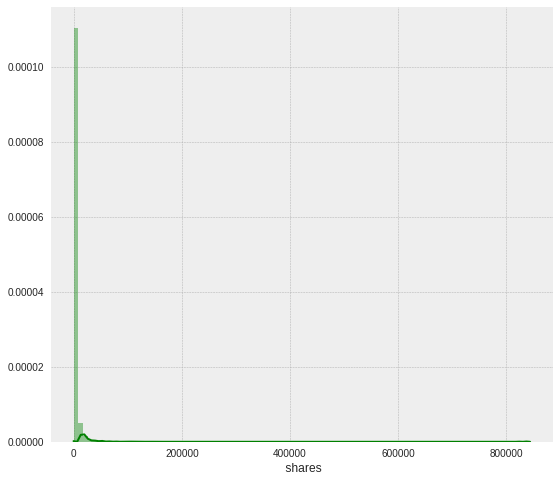

In [0]:
print(mash[' shares'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(mash[' shares'], color='g', bins=100, hist_kws={'alpha': 0.4});



count    31715.000000
mean         7.475066
std          0.931191
min          1.386294
25%          6.856462
50%          7.244228
75%          7.937375
max         13.645078
Name:  shares, dtype: float64


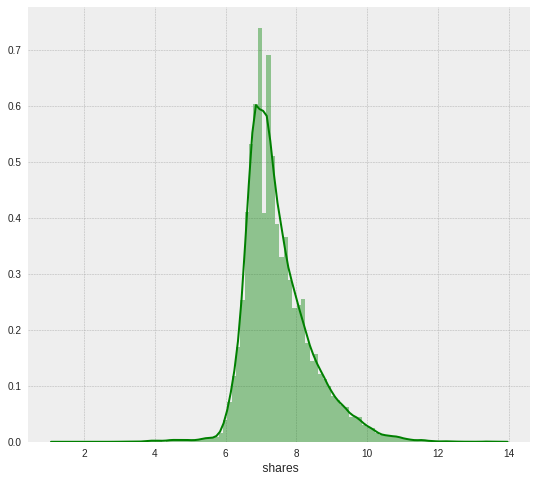

In [0]:
# take natural log of shares to reduce impact of outliers
# it is still right-skewed but it's reduced the impact
print(np.log(mash[' shares']).describe())
plt.figure(figsize=(9, 8))
sns.distplot(np.log(mash[' shares']), color='g', bins=100, hist_kws={'alpha': 0.4});

count    29936.000000
mean      2020.330739
std       1749.006197
min          4.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max       9900.000000
Name:  shares, dtype: float64


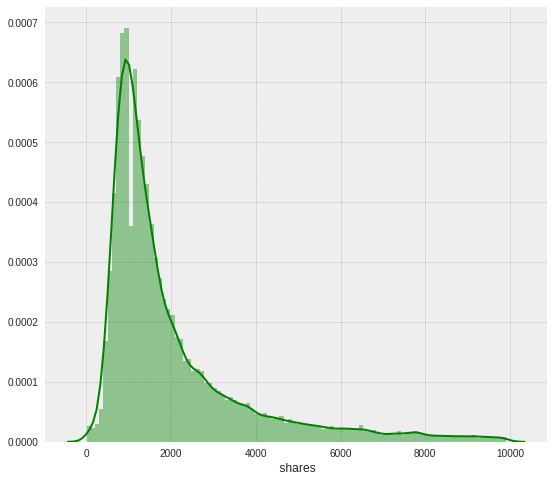

In [0]:
#create a dataframe that only contains the instances that were shared
#<10k times (we can play with this number)
nooutliers=mash.loc[mash[' shares'] < 10000]

print(nooutliers[' shares'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(nooutliers[' shares'], color='g', bins=100, hist_kws={'alpha': 0.4});

#FIX THESE AXES!!!!

In [0]:
#list all types of data in dataset
list(set(mash.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [0]:
#select only the numerical types of data
mashnum=mash.select_dtypes(include=['float64','int64'])
mashnum.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,581.0,9.0,645.0,0.523659,1.0,0.705722,9.0,4.0,1.0,0.0,...,0.033333,0.8,-0.249653,-0.4,-0.125,0.066667,0.033333,0.433333,0.033333,821
1,661.0,11.0,2104.0,0.376261,1.0,0.557325,25.0,3.0,11.0,0.0,...,0.100000,1.0,-0.275221,-0.8,-0.050,0.100000,0.000000,0.400000,0.000000,784
2,113.0,10.0,540.0,0.580786,1.0,0.649852,30.0,2.0,1.0,0.0,...,0.033333,0.8,-0.300000,-0.8,-0.050,0.900000,0.500000,0.400000,0.500000,1400
3,107.0,10.0,711.0,0.530670,1.0,0.668113,21.0,7.0,2.0,0.0,...,0.033333,0.8,-0.251282,-0.5,-0.050,0.100000,0.200000,0.400000,0.200000,781
4,161.0,13.0,796.0,0.473418,1.0,0.624242,12.0,0.0,1.0,0.0,...,0.100000,0.6,-0.194753,-0.6,-0.050,0.400000,0.100000,0.100000,0.100000,2400


In [0]:
mashnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 60 columns):
 timedelta                        31715 non-null float64
 n_tokens_title                   31715 non-null float64
 n_tokens_content                 31715 non-null float64
 n_unique_tokens                  31715 non-null float64
 n_non_stop_words                 31715 non-null float64
 n_non_stop_unique_tokens         31715 non-null float64
 num_hrefs                        31715 non-null float64
 num_self_hrefs                   31715 non-null float64
 num_imgs                         31715 non-null float64
 num_videos                       31715 non-null float64
 average_token_length             31715 non-null float64
 num_keywords                     31715 non-null float64
 data_channel_is_lifestyle        31715 non-null float64
 data_channel_is_entertainment    31715 non-null float64
 data_channel_is_bus              31715 non-null float64
 data_channel_is_socmed           31

In [0]:
#all column titles
mashnum_cols=[col for col in mashnum]
print(mashnum_cols)

[' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_n

In [0]:
#categorical variables
bool_cols = [col for col in mash if 
               mash[col].dropna().value_counts().index.isin([0,1]).all()]
print(bool_cols)

[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']


In [0]:
#categorical variables dataframe
categorical_var=mash[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']]
type(categorical_var)
categorical_var

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#continuous variables dataframe
continuous_var=mash[[' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares']]
type(continuous_var)
continuous_var

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,581.0,9.0,645.0,0.523659,1.0,0.705722,9.0,4.0,1.0,0.0,...,0.033333,0.80,-0.249653,-0.400000,-0.125000,0.066667,0.033333,0.433333,0.033333,821
1,661.0,11.0,2104.0,0.376261,1.0,0.557325,25.0,3.0,11.0,0.0,...,0.100000,1.00,-0.275221,-0.800000,-0.050000,0.100000,0.000000,0.400000,0.000000,784
2,113.0,10.0,540.0,0.580786,1.0,0.649852,30.0,2.0,1.0,0.0,...,0.033333,0.80,-0.300000,-0.800000,-0.050000,0.900000,0.500000,0.400000,0.500000,1400
3,107.0,10.0,711.0,0.530670,1.0,0.668113,21.0,7.0,2.0,0.0,...,0.033333,0.80,-0.251282,-0.500000,-0.050000,0.100000,0.200000,0.400000,0.200000,781
4,161.0,13.0,796.0,0.473418,1.0,0.624242,12.0,0.0,1.0,0.0,...,0.100000,0.60,-0.194753,-0.600000,-0.050000,0.400000,0.100000,0.100000,0.100000,2400
5,434.0,9.0,375.0,0.538889,1.0,0.631579,21.0,3.0,13.0,0.0,...,0.166667,1.00,-0.337037,-0.800000,-0.155556,0.000000,0.000000,0.500000,0.000000,2200
6,55.0,11.0,1036.0,0.373062,1.0,0.583019,8.0,5.0,1.0,0.0,...,0.033333,0.90,-0.230044,-0.500000,-0.050000,0.400000,0.100000,0.100000,0.100000,812
7,167.0,13.0,1070.0,0.429518,1.0,0.643225,11.0,6.0,1.0,0.0,...,0.062500,1.00,-0.250772,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,938
8,336.0,13.0,136.0,0.723881,1.0,0.886076,5.0,2.0,0.0,0.0,...,0.200000,0.90,-0.375000,-0.500000,-0.150000,0.375000,-0.125000,0.125000,0.125000,906
9,248.0,13.0,252.0,0.634538,1.0,0.786164,5.0,3.0,1.0,0.0,...,0.033333,0.70,-0.297917,-0.500000,-0.187500,0.000000,0.000000,0.500000,0.000000,776


# Univariate Analysis

In [0]:
#categorical features

#fig, axes = plt.subplots(1, 4, figsize=(8, 10))
#sns.countplot(' data_channel_is_lifestyle', ' data_channel_is_entertainment', data=mash)
#sns.countplot(' data_channel_is_entertainment', data=mash,ax=axes[0,1])
#sns.countplot(' data_channel_is_bus', data=mash,ax=axes[0,2])
#sns.countplot(' data_channel_is_socmed', data=mash,ax=axes[0,3])

#categorical variables dataframe
#categorical_var=mash[[a_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']]
#type(categorical_var)
#categorical_var

#sns.countplot('Survived',data=train,ax=axes[0,0])
#sns.countplot('Pclass',data=train,ax=axes[0,1])
#sns.countplot('Sex',data=train,ax=axes[0,2])
#sns.countplot('SibSp',data=train,ax=axes[0,3])
#sns.countplot('Parch',data=train,ax=axes[1,0])
#sns.countplot('Embarked',data=train,ax=axes[1,1])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


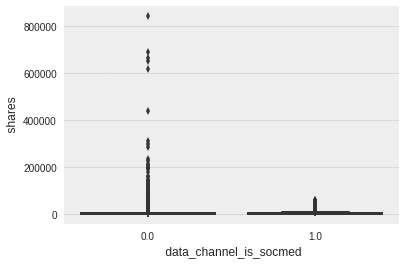

In [0]:

#figbi, axesbi = plt.subplots(1,3, figsize=(8,10))
#sns.boxplot(x=' data_channel_is_lifestyle', y=' shares', data=mash, ax=axesbi[0,0])
#sns.boxplot(x=' data_channel_is_bus', y=' shares', data=mash, ax=axesbi[0,1])
sns.boxplot(x=' data_channel_is_socmed', y=' shares', data=mash)
#sns.boxplot(categorical_var[' data_channel_is_socmed'])
#sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


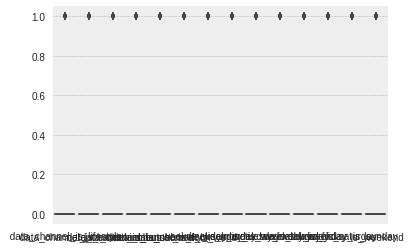

In [0]:
#figbi, axesbi = plt.subplots(1,2, figsize=(8,10))
#sns.boxplot(x=' data_channel_is_lifestyle', y=' shares', data=mash, ax=axesbi[0,0])
#sns.boxplot(x=' data_channel_is_bus', y=' shares', data=mash, ax=axesbi[0,1])

sns.boxplot(categorical_var);

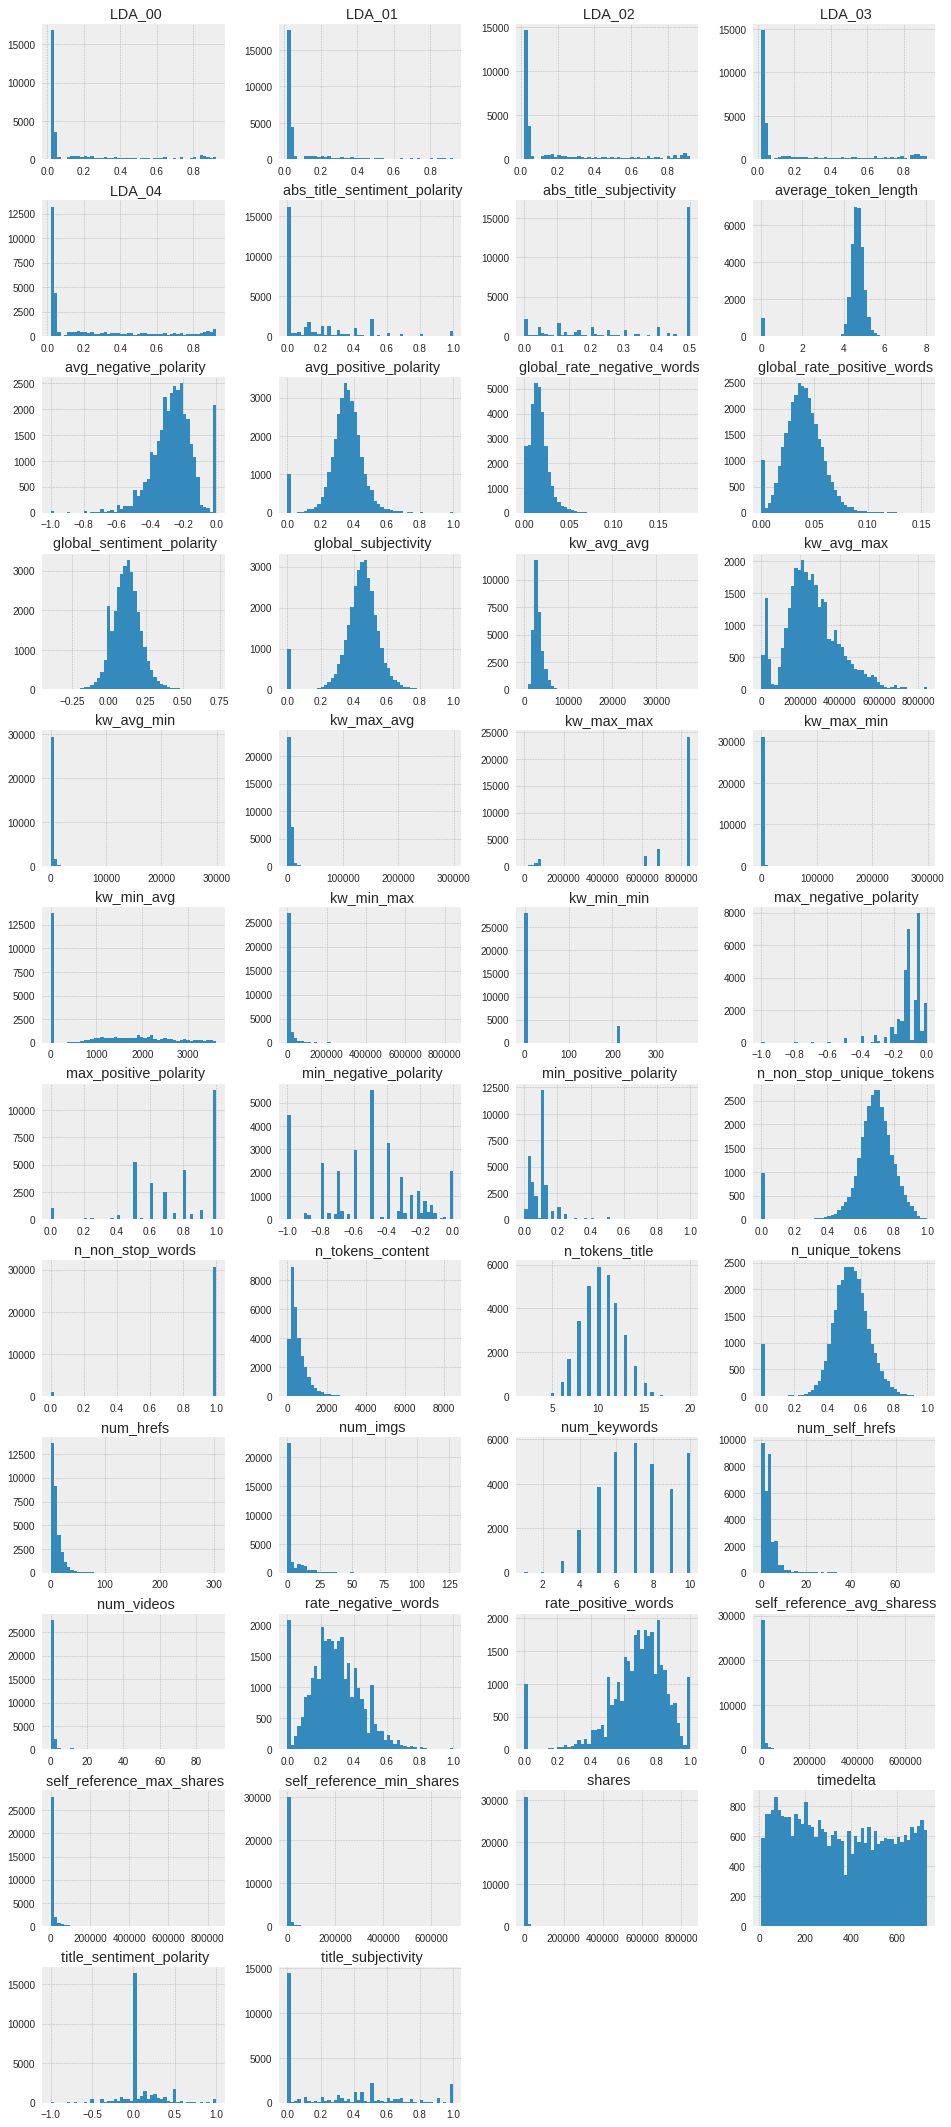

In [0]:
#histograms of continuous variables against shares
#(the ; gives plots rather than descriptions of arrays)
continuous_var.hist(figsize=(16,48),layout=(15,4),bins=50);
#mashnum.hist(figsize=(16,48),layout=(15,4),bins=50);

In [0]:
mashnumcorr=mashnum.corr()[' shares'][:-1]
print(mashnumcorr)

 timedelta                        0.007679
 n_tokens_title                   0.007434
 n_tokens_content                 0.001679
 n_unique_tokens                 -0.011651
 n_non_stop_words                -0.022395
 n_non_stop_unique_tokens        -0.025144
 num_hrefs                        0.043456
 num_self_hrefs                  -0.000781
 num_imgs                         0.038690
 num_videos                       0.024405
 average_token_length            -0.023385
 num_keywords                     0.021046
 data_channel_is_lifestyle        0.000374
 data_channel_is_entertainment   -0.014426
 data_channel_is_bus             -0.010802
 data_channel_is_socmed           0.003648
 data_channel_is_tech            -0.010700
 data_channel_is_world           -0.049599
 kw_min_min                      -0.002382
 kw_max_min                       0.035729
 kw_avg_min                       0.037882
 kw_min_max                       0.002627
 kw_max_max                       0.007623
 kw_avg_max

In [0]:
type(mashnumcorr)

pandas.core.series.Series

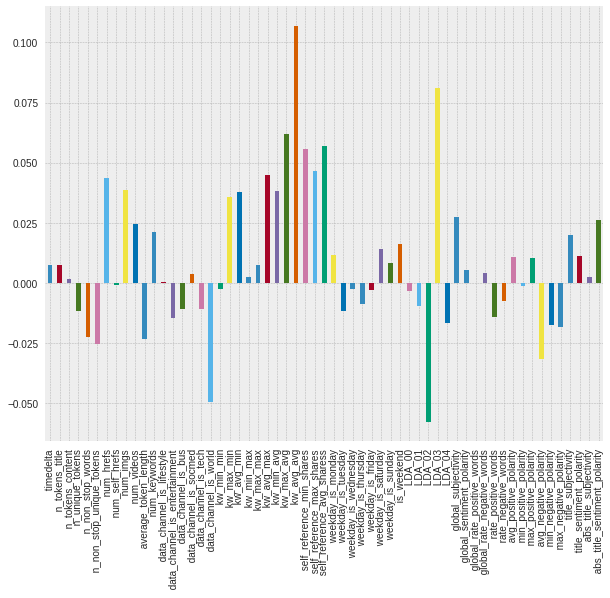

In [0]:
#mashnumcorr.plot()
plt.figure();

mashnumcorr.plot(figsize=(10,8),kind='bar');

In [0]:
posfeatures=mashnumcorr[(mashnumcorr)>0].sort_values(ascending=False)
print(posfeatures)

 kw_avg_avg                      0.106729
 LDA_03                          0.081134
 kw_max_avg                      0.061826
 self_reference_avg_sharess      0.056875
 self_reference_min_shares       0.055675
 self_reference_max_shares       0.046603
 kw_avg_max                      0.045036
 num_hrefs                       0.043456
 num_imgs                        0.038690
 kw_min_avg                      0.038378
 kw_avg_min                      0.037882
 kw_max_min                      0.035729
 global_subjectivity             0.027350
 abs_title_sentiment_polarity    0.026020
 num_videos                      0.024405
 num_keywords                    0.021046
 title_subjectivity              0.019857
 is_weekend                      0.016266
 weekday_is_saturday             0.014000
 weekday_is_monday               0.011771
 title_sentiment_polarity        0.011188
 avg_positive_polarity           0.010695
 max_positive_polarity           0.010205
 weekday_is_sunday               0

In [0]:
negfeatures=mashnumcorr[(mashnumcorr)<0].sort_values(ascending=True)
print(negfeatures)

 LDA_02                          -0.057536
 data_channel_is_world           -0.049599
 avg_negative_polarity           -0.031501
 n_non_stop_unique_tokens        -0.025144
 average_token_length            -0.023385
 n_non_stop_words                -0.022395
 max_negative_polarity           -0.018371
 min_negative_polarity           -0.017477
 LDA_04                          -0.016432
 data_channel_is_entertainment   -0.014426
 rate_positive_words             -0.014034
 weekday_is_tuesday              -0.011685
 n_unique_tokens                 -0.011651
 data_channel_is_bus             -0.010802
 data_channel_is_tech            -0.010700
 LDA_01                          -0.009536
 weekday_is_thursday             -0.008679
 rate_negative_words             -0.007461
 LDA_00                          -0.003102
 weekday_is_friday               -0.002987
 weekday_is_wednesday            -0.002533
 kw_min_min                      -0.002382
 min_positive_polarity           -0.001387
 num_self_h

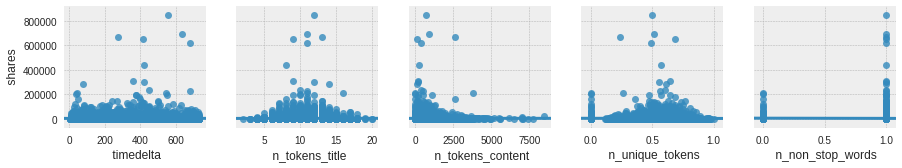

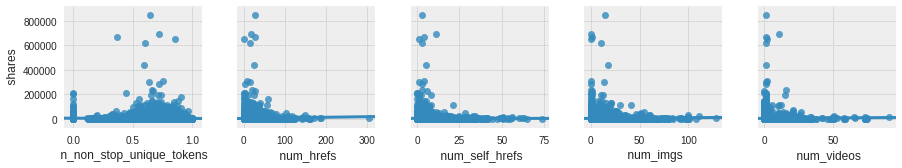

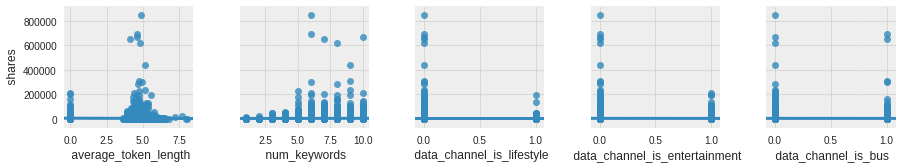

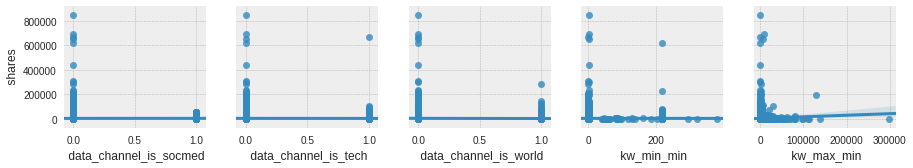

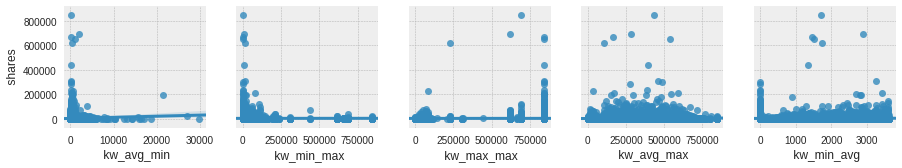

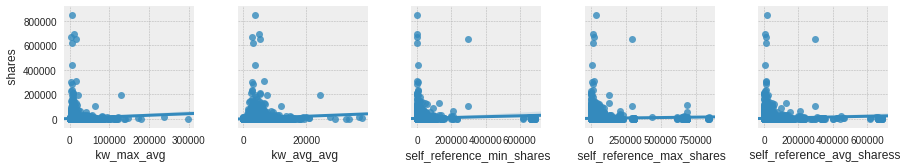

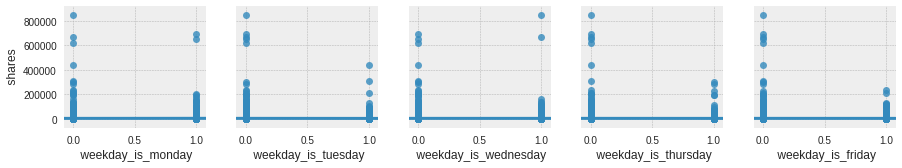

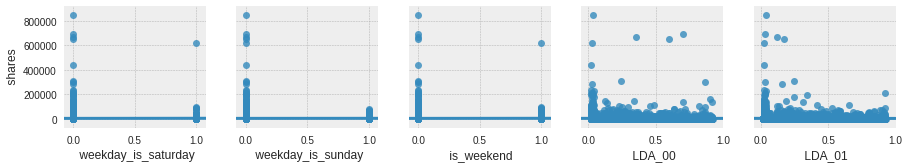

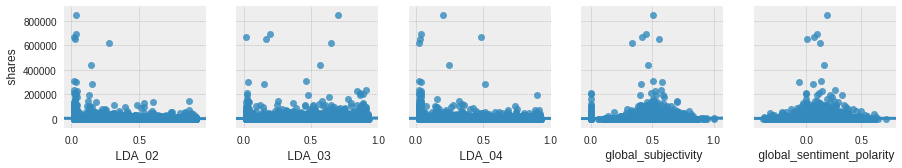

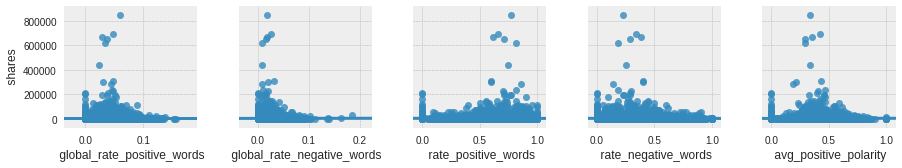

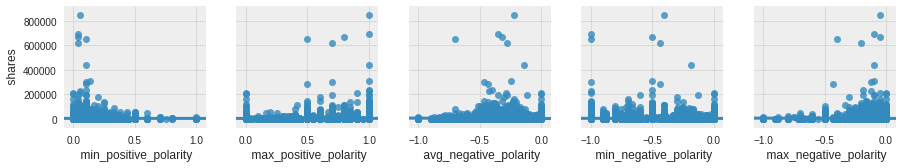

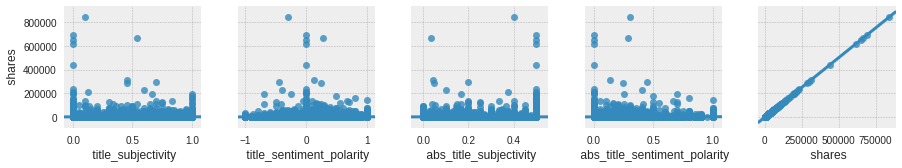

In [0]:
for i in range(0,len(mashnum.columns),5):
    sns.pairplot(data=mashnum,
                x_vars=mashnum.columns[i:i+5],
                y_vars=[' shares'], kind='reg')

In [0]:
import operator

eachfeaturemash=[]
for i in range(0, len(mashnum.columns) - 1): #because last column is shares
    tempmash=mashnum[[mashnum.columns[i],' shares']]
    tempmash=tempmash[tempmash[mashnum.columns[i]] !=0]
    eachfeaturemash.append(tempmash)
    
allcorrs = {feature.columns[0]:feature.corr()[' shares'][0] for feature in eachfeaturemash}
allcorrs = sorted(allcorrs.items(),key=operator.itemgetter(1))
for (key, value) in allcorrs:
    print("{:>15}:{:>15}".format(key,value))

 avg_negative_polarity:-0.04377456148501504
 min_negative_polarity:-0.02501274338359467
 max_negative_polarity:-0.022419178424384754
 n_non_stop_unique_tokens:-0.012624262421724347
 n_non_stop_words:-0.008293230506141374
 average_token_length:-0.006927077712656973
 num_self_hrefs:-0.0054785965660929204
     kw_min_min:-0.002463888832308196
     kw_min_max:0.0015874335292132447
     num_videos:0.00270719626087585
 n_unique_tokens:0.005136512887206404
 n_tokens_content:0.0065594756703614525
     kw_max_max:0.006947986608636284
 n_tokens_title:0.007433735698270339
      timedelta:0.007679046054532565
   num_keywords:0.02104613155676023
 self_reference_max_shares:0.04666412661296021
      num_hrefs:0.04866845589350596
       num_imgs:0.061989566834143695
 data_channel_is_lifestyle:            nan
 data_channel_is_entertainment:            nan
 data_channel_is_bus:            nan
 data_channel_is_socmed:            nan
 data_channel_is_tech:            nan
 data_channel_is_world:           

In [0]:
goldfeat=[key for key, value in allcorrs if abs(value)>=0.075]
print(goldfeat)
# "strongly" correlated, they are using 0.5, we can't really consider these "strong"

[' kw_avg_avg', ' LDA_03']


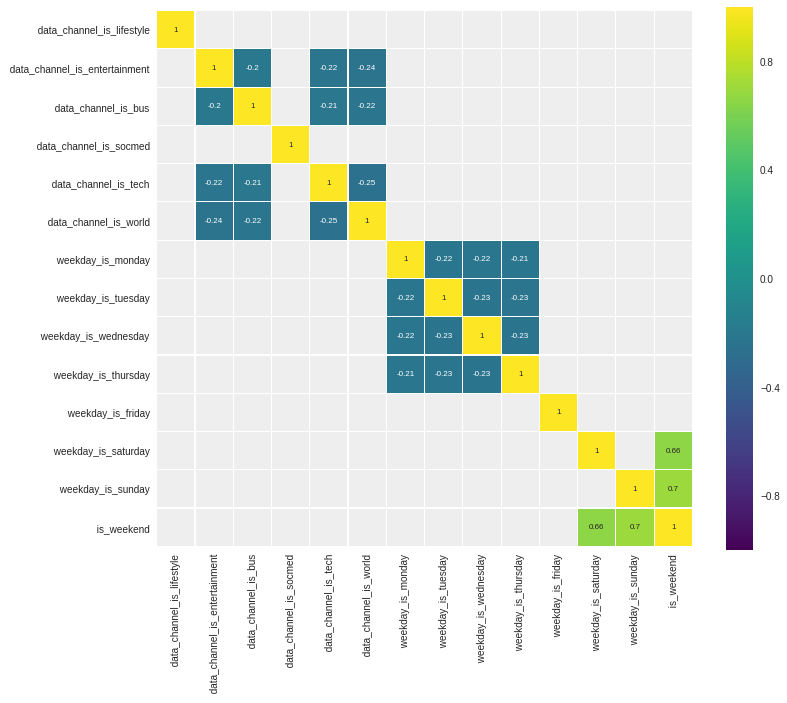

In [0]:
corr=categorical_var.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr>=0.2)|(corr<=-0.2)],
           cmap='viridis',vmax=1.0,vmin=-1.0, linewidths=0.1, annot=True, 
            annot_kws={"size":8},square=True);

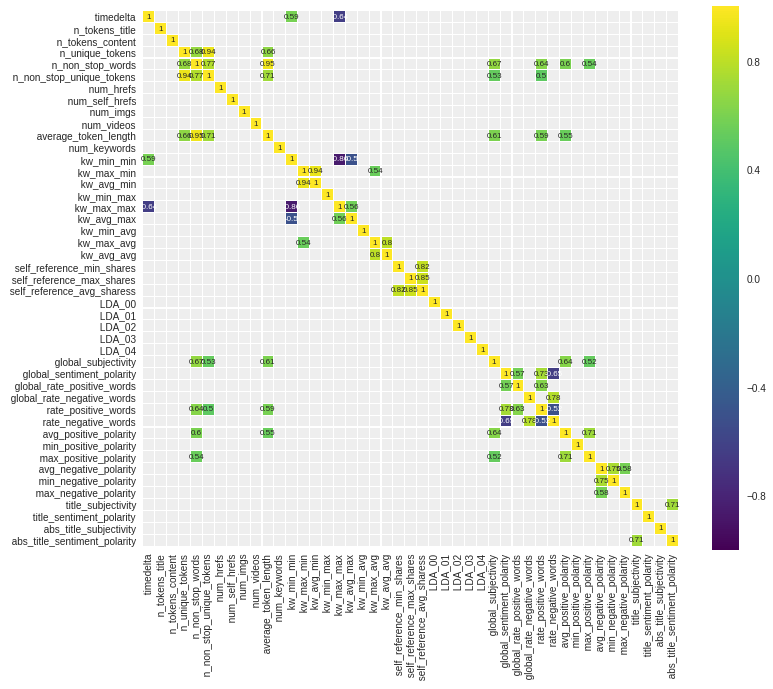

In [0]:
corr=continuous_var.drop(' shares', axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr>=0.5)|(corr<=-0.5)],
           cmap='viridis',vmax=1.0,vmin=-1.0, linewidths=0.1, annot=True, 
            annot_kws={"size":8},square=True);

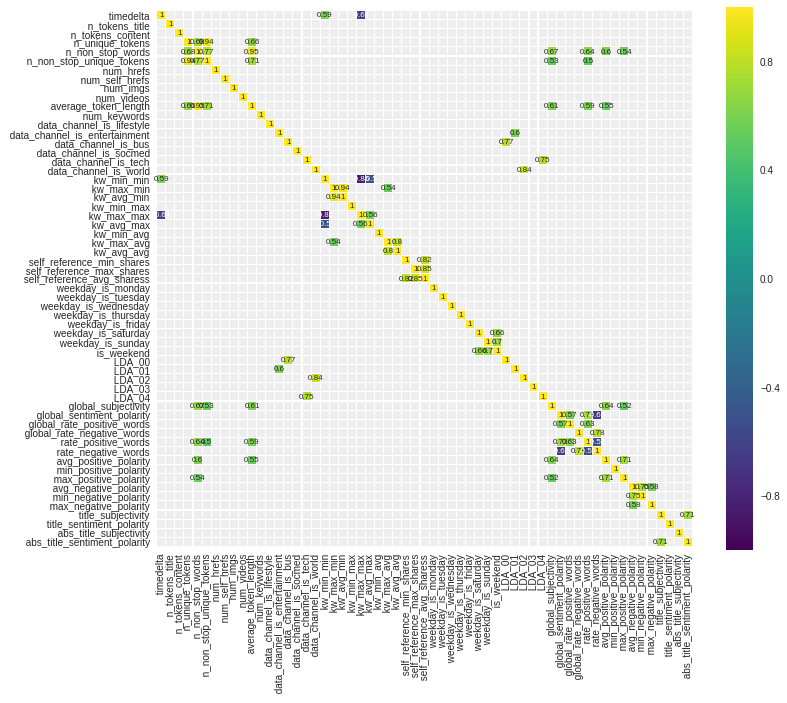

In [0]:
corr=mashnum.drop(' shares', axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr>=0.5)|(corr<=-0.5)],
           cmap='viridis',vmax=1.0,vmin=-1.0, linewidths=0.1, annot=True, 
            annot_kws={"size":8},square=True);

Explain correlations here/play with features selected to make heatmap for readable..

In [0]:
#jacked from Ali's code
mashdays=pd.DataFrame({'Monday':mash[' weekday_is_monday'],'Tuesday':mash[' weekday_is_tuesday'],'Wednesday':mash[' weekday_is_wednesday'],'Thursday':mash[' weekday_is_thursday'],'Friday':mash[' weekday_is_friday'],'Saturday':mash[' weekday_is_saturday'],'Sunday':mash[' weekday_is_sunday'],'Shares':mash[' shares']})

In [0]:
mashdays=mashdays[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Shares']]
mashdays.head()


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Shares
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,821
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,784
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1400
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,781
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2400


In [0]:
mashdays.corr()['Shares'][0:7]

Monday       0.011771
Tuesday     -0.011685
Wednesday   -0.002533
Thursday    -0.008679
Friday      -0.002987
Saturday     0.014000
Sunday       0.008316
Name: Shares, dtype: float64